In [2]:
import pandas
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import weightedstats
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

import vincent
import folium
from IPython.display import HTML

#Preparation
The data files come in slightly different format over the years, so it's important to normalize the spaces, headers, line feeds etc:

In [3]:
def strip(text):
    try:
        return str(text).strip()
    except AttributeError:
        return str(text)
    
stripper = {'BUILDING CLASS CATEGORY' : strip, 'BUILDING CLASS CATEGORY\n' : strip, 'ADDRESS' : strip,
             'ADDRESS\n' :strip, 'APARTMENT NUMBER' : strip, 'APARTMENT NUMBER\n' : strip}

m2014 = pandas.read_excel(io='/home/ms142/nyproperty/rollingsales_manhattan.xls',skiprows=3,header=1,converters=stripper)
k2014 = pandas.read_excel(io='/home/ms142/nyproperty/rollingsales_brooklyn.xls',skiprows=3,header=1,converters=stripper)
q2014 = pandas.read_excel(io='/home/ms142/nyproperty/rollingsales_queens.xls',skiprows=3,header=1,converters=stripper)
x2014 = pandas.read_excel(io='/home/ms142/nyproperty/rollingsales_bronx.xls',skiprows=3,header=1,converters=stripper)
s2014 = pandas.read_excel(io='/home/ms142/nyproperty/rollingsales_statenisland.xls',skiprows=3,header=1,converters=stripper)

m2013 = pandas.read_excel(io='/home/ms142/nyproperty/2013_manhattan.xls',skiprows=3,header=1,converters=stripper).rename(columns=lambda x: x.strip())
k2013 = pandas.read_excel(io='/home/ms142/nyproperty/2013_brooklyn.xls',skiprows=3,header=1,converters=stripper).rename(columns=lambda x: x.strip())
q2013 = pandas.read_excel(io='/home/ms142/nyproperty/2013_queens.xls',skiprows=3,header=1,converters=stripper).rename(columns=lambda x: x.strip())
x2013 = pandas.read_excel(io='/home/ms142/nyproperty/2013_bronx.xls',skiprows=3,header=1,converters=stripper).rename(columns=lambda x: x.strip())
s2013 = pandas.read_excel(io='/home/ms142/nyproperty/2013_statenisland.xls',skiprows=3,header=1,converters=stripper).rename(columns=lambda x: x.strip())

m2012 = pandas.read_excel(io='/home/ms142/nyproperty/2012_manhattan.xls',skiprows=3,header=1,converters=stripper).rename(columns=lambda x: x.strip())
k2012 = pandas.read_excel(io='/home/ms142/nyproperty/2012_brooklyn.xls',skiprows=3,header=1,converters=stripper).rename(columns=lambda x: x.strip())
q2012 = pandas.read_excel(io='/home/ms142/nyproperty/2012_queens.xls',skiprows=3,header=1,converters=stripper).rename(columns=lambda x: x.strip())
x2012 = pandas.read_excel(io='/home/ms142/nyproperty/2012_bronx.xls',skiprows=3,header=1,converters=stripper).rename(columns=lambda x: x.strip())
s2012 = pandas.read_excel(io='/home/ms142/nyproperty/2012_statenisland.xls',skiprows=3,header=1,converters=stripper).rename(columns=lambda x: x.strip())

m2011 = pandas.read_excel(io='/home/ms142/nyproperty/2011_manhattan.xls',skiprows=3,header=1,converters=stripper).rename(columns=lambda x: x.strip())
k2011 = pandas.read_excel(io='/home/ms142/nyproperty/2011_brooklyn.xls',skiprows=3,header=1,converters=stripper).rename(columns=lambda x: x.strip())
q2011 = pandas.read_excel(io='/home/ms142/nyproperty/2011_queens.xls',skiprows=3,header=1,converters=stripper).rename(columns=lambda x: x.strip())
x2011 = pandas.read_excel(io='/home/ms142/nyproperty/2011_bronx.xls',skiprows=3,header=1,converters=stripper).rename(columns=lambda x: x.strip())
s2011 = pandas.read_excel(io='/home/ms142/nyproperty/2011_statenisland.xls',skiprows=3,header=1,converters=stripper).rename(columns=lambda x: x.strip())

m2010 = pandas.read_excel(io='/home/ms142/nyproperty/2010_manhattan.xls',skiprows=2,header=1,converters=stripper).rename(columns=lambda x: x.strip())
k2010 = pandas.read_excel(io='/home/ms142/nyproperty/2010_brooklyn.xls',skiprows=2,header=1,converters=stripper).rename(columns=lambda x: x.strip())
q2010 = pandas.read_excel(io='/home/ms142/nyproperty/2010_queens.xls',skiprows=2,header=1,converters=stripper).rename(columns=lambda x: x.strip())
x2010 = pandas.read_excel(io='/home/ms142/nyproperty/2010_bronx.xls',skiprows=2,header=1,converters=stripper).rename(columns=lambda x: x.strip())
s2010 = pandas.read_excel(io='/home/ms142/nyproperty/2010_statenisland.xls',skiprows=2,header=1,converters=stripper).rename(columns=lambda x: x.strip())

global max_year_in_data
max_year_in_data = 5

# Could do more years if we need to
#
# m2009 = pandas.read_excel(io='/home/ms142/nyproperty/2009_manhattan.xls',skiprows=2,header=1,converters=stripper).rename(columns=lambda x:x.strip())
# k2009 = pandas.read_excel(io='/home/ms142/nyproperty/2009_brooklyn.xls',skiprows=2,header=1,converters=stripper).rename(columns=lambda x:x.strip())
# q2009 = pandas.read_excel(io='/home/ms142/nyproperty/2009_queens.xls',skiprows=2,header=1,converters=stripper).rename(columns=lambda x:x.strip())
# x2009 = pandas.read_excel(io='/home/ms142/nyproperty/2009_bronx.xls',skiprows=2,header=1,converters=stripper).rename(columns=lambda x:x.strip())
# s2009 = pandas.read_excel(io='/home/ms142/nyproperty/2009_statenisland.xls',skiprows=2,header=1,converters=stripper).rename(columns=lambda x:x.strip())

# m2008 = pandas.read_excel(io='/home/ms142/nyproperty/sales_2008_manhattan.xls',skiprows=2,header=1,converters=stripper).rename(columns=lambda x:x.strip())
# k2008 = pandas.read_excel(io='/home/ms142/nyproperty/sales_2008_brooklyn.xls',skiprows=2,header=1,converters=stripper).rename(columns=lambda x:x.strip())
# q2008 = pandas.read_excel(io='/home/ms142/nyproperty/sales_2008_queens.xls',skiprows=2,header=1,converters=stripper).rename(columns=lambda x:x.strip())
# x2008 = pandas.read_excel(io='/home/ms142/nyproperty/sales_2008_bronx.xls',skiprows=2,header=1,converters=stripper).rename(columns=lambda x:x.strip())
# s2008 = pandas.read_excel(io='/home/ms142/nyproperty/sales_2008_statenisland.xls',skiprows=2,header=1,converters=stripper).rename(columns=lambda x:x.strip())

# m2007 = pandas.read_excel(io='/home/ms142/nyproperty/sales_2007_manhattan.xls',skiprows=2,header=1,converters=stripper).rename(columns=lambda x:x.strip())
# k2007 = pandas.read_excel(io='/home/ms142/nyproperty/sales_2007_brooklyn.xls',skiprows=2,header=1,converters=stripper).rename(columns=lambda x:x.strip())
# q2007 = pandas.read_excel(io='/home/ms142/nyproperty/sales_2007_queens.xls',skiprows=2,header=1,converters=stripper).rename(columns=lambda x:x.strip())
# x2007 = pandas.read_excel(io='/home/ms142/nyproperty/sales_2007_bronx.xls',skiprows=2,header=1,converters=stripper).rename(columns=lambda x:x.strip())
# s2007 = pandas.read_excel(io='/home/ms142/nyproperty/sales_2007_statenisland.xls',skiprows=2,header=1,converters=stripper).rename(columns=lambda x:x.strip())

# m2006 = pandas.read_excel(io='/home/ms142/nyproperty/sales_manhattan_06.xls',skiprows=2,header=1,converters=stripper).rename(columns=lambda x:x.strip())
# k2006 = pandas.read_excel(io='/home/ms142/nyproperty/sales_brooklyn_06.xls',skiprows=2,header=1,converters=stripper).rename(columns=lambda x:x.strip())
# q2006 = pandas.read_excel(io='/home/ms142/nyproperty/sales_queens_06.xls',skiprows=2,header=1,converters=stripper).rename(columns=lambda x:x.strip())
# x2006 = pandas.read_excel(io='/home/ms142/nyproperty/sales_bronx_06.xls',skiprows=2,header=1,converters=stripper).rename(columns=lambda x:x.strip())
# s2006 = pandas.read_excel(io='/home/ms142/nyproperty/sales_si_06.xls',skiprows=2,header=1,converters=stripper).rename(columns=lambda x:x.strip())

# m2005 = pandas.read_excel(io='/home/ms142/nyproperty/sales_manhattan_05.xls',skiprows=2,header=1,converters=stripper).rename(columns=lambda x:x.strip())
# k2005 = pandas.read_excel(io='/home/ms142/nyproperty/sales_brooklyn_05.xls',skiprows=2,header=1,converters=stripper).rename(columns=lambda x:x.strip())
# q2005 = pandas.read_excel(io='/home/ms142/nyproperty/sales_queens_05.xls',skiprows=2,header=1,converters=stripper).rename(columns=lambda x:x.strip())
# x2005 = pandas.read_excel(io='/home/ms142/nyproperty/sales_bronx_05.xls',skiprows=2,header=1,converters=stripper).rename(columns=lambda x:x.strip())
# s2005 = pandas.read_excel(io='/home/ms142/nyproperty/sales_si_05.xls',skiprows=2,header=1,converters=stripper).rename(columns=lambda x:x.strip())

# m2004 = pandas.read_excel(io='/home/ms142/nyproperty/sales_manhattan_04.xls',skiprows=2,header=1,converters=stripper).rename(columns=lambda x:x.strip())
# k2004 = pandas.read_excel(io='/home/ms142/nyproperty/sales_brooklyn_04.xls',skiprows=2,header=1,converters=stripper).rename(columns=lambda x:x.strip())
# q2004 = pandas.read_excel(io='/home/ms142/nyproperty/sales_queens_04.xls',skiprows=2,header=1,converters=stripper).rename(columns=lambda x:x.strip())
# x2004 = pandas.read_excel(io='/home/ms142/nyproperty/sales_bronx_04.xls',skiprows=2,header=1,converters=stripper).rename(columns=lambda x:x.strip())
# s2004 = pandas.read_excel(io='/home/ms142/nyproperty/sales_si_04.xls',skiprows=2,header=1,converters=stripper).rename(columns=lambda x:x.strip())

# m2003 = pandas.read_excel(io='/home/ms142/nyproperty/sales_manhattan_03.xls',skiprows=2,header=1,converters=stripper).rename(columns=lambda x:x.strip())
# k2003 = pandas.read_excel(io='/home/ms142/nyproperty/sales_brooklyn_03.xls',skiprows=2,header=1,converters=stripper).rename(columns=lambda x:x.strip())
# q2003 = pandas.read_excel(io='/home/ms142/nyproperty/sales_queens_03.xls',skiprows=2,header=1,converters=stripper).rename(columns=lambda x:x.strip())
# x2003 = pandas.read_excel(io='/home/ms142/nyproperty/sales_bronx_03.xls',skiprows=2,header=1,converters=stripper).rename(columns=lambda x:x.strip())
# s2003 = pandas.read_excel(io='/home/ms142/nyproperty/sales_si_03.xls',skiprows=2,header=1,converters=stripper).rename(columns=lambda x:x.strip())


#Overlapping Dates and Incomplete Data
It turns out that the 2014 data files only goes up to Nov 2014 but contains Dec of 2013, which overlaps the 2013 files. This means we need to append things carefully to avoid double counting, and more importantly, when we compare 2014 with previous years we should only compare 11 months.

In [4]:
print m2014['SALE DATE'].min(), m2014['SALE DATE'].max()
print m2013['SALE DATE'].min(), m2013['SALE DATE'].max()
print m2012['SALE DATE'].min(), m2012['SALE DATE'].max()

2013-12-01 00:00:00 2014-11-25 00:00:00
2013-01-01 00:00:00 2013-12-31 00:00:00
2012-01-01 00:00:00 2012-12-31 00:00:00


In [5]:
df14 = pandas.concat([m2014,k2014,q2014,x2014,s2014],ignore_index=True)
df13 = pandas.concat([m2013,k2013,q2013,x2013,s2013],ignore_index=True)
df = pandas.concat([df14,df13[df13['SALE DATE']<df14['SALE DATE'].min()],
                         m2012,k2012,q2012,x2012,s2012,
                         m2011,k2011,q2011,x2011,s2011,
                         m2010,k2010,q2010,x2010,s2010],
                         ignore_index=True)

In [6]:
df14['year']=pandas.DatetimeIndex(df14['SALE DATE']).year
df14['month']=pandas.DatetimeIndex(df14['SALE DATE']).month
df['year']=pandas.DatetimeIndex(df['SALE DATE']).year
df['month']=pandas.DatetimeIndex(df['SALE DATE']).month

In [7]:
df['APARTMENT NUMBER'] = df['APARTMENT NUMBER'].fillna('NA').astype(str)
df14['APARTMENT NUMBER'] = df14['APARTMENT NUMBER'].fillna('NA').astype(str)
df['NEIGHBORHOOD'] = df['NEIGHBORHOOD'].apply(lambda x : x.strip())
df14['NEIGHBORHOOD'] = df14['NEIGHBORHOOD'].apply(lambda x : x.strip())

#Cleaning Price Records
Removing entries with abnormally small prices help remove gifts and spurious records:

In [8]:
df=df[df['SALE PRICE']>1e4]
df14=df14[df14['SALE PRICE']>1e4]

#Most active months by Building Class
Note that the December below corresponds to Dec 2013 since we don't have Dec 2014. 

In [9]:
df14.pivot_table(index=['BUILDING CLASS CATEGORY'],columns=['month'],values=['SALE PRICE'],margins=True,
               aggfunc=np.count_nonzero)['SALE PRICE'].fillna(0)

month,1,2,3,4,5,6,7,8,9,10,11,12,All
BUILDING CLASS CATEGORY,,,,,,,,,,,,,
01 ONE FAMILY DWELLINGS,813,721,780,731,836,938,1032,963,914,679,128,982,9517
02 TWO FAMILY DWELLINGS,733,624,751,680,772,774,814,796,765,632,124,780,8245
03 THREE FAMILY DWELLINGS,198,192,254,192,198,202,224,192,208,185,27,217,2289
04 TAX CLASS 1 CONDOS,70,81,57,83,100,106,90,93,73,67,15,102,937
05 TAX CLASS 1 VACANT LAND,31,42,45,45,46,44,53,53,41,28,8,38,474
06 TAX CLASS 1 - OTHER,4,5,1,4,6,9,5,7,3,2,3,8,57
07 RENTALS - WALKUP APARTMENTS,187,194,186,196,219,216,214,158,202,143,36,241,2192
08 RENTALS - ELEVATOR APARTMENTS,38,31,46,29,34,27,27,23,33,23,1,60,372
09 COOPS - WALKUP APARTMENTS,207,186,174,210,200,214,252,238,235,202,57,228,2403


In [9]:
df14.pivot_table(index=['BUILDING CLASS CATEGORY'],columns=['month'],values=['SALE PRICE'],margins=False, aggfunc=np.count_nonzero).fillna(0).idxmax(axis=1)

BUILDING CLASS CATEGORY
01  ONE FAMILY DWELLINGS                        (SALE PRICE, 7)
02  TWO FAMILY DWELLINGS                        (SALE PRICE, 7)
03  THREE FAMILY DWELLINGS                      (SALE PRICE, 3)
04  TAX CLASS 1 CONDOS                          (SALE PRICE, 6)
05  TAX CLASS 1 VACANT LAND                     (SALE PRICE, 7)
06  TAX CLASS 1 - OTHER                         (SALE PRICE, 6)
07  RENTALS - WALKUP APARTMENTS                (SALE PRICE, 12)
08  RENTALS - ELEVATOR APARTMENTS              (SALE PRICE, 12)
09  COOPS - WALKUP APARTMENTS                   (SALE PRICE, 7)
10  COOPS - ELEVATOR APARTMENTS                 (SALE PRICE, 7)
11A CONDO-RENTALS                              (SALE PRICE, 12)
12  CONDOS - WALKUP APARTMENTS                 (SALE PRICE, 12)
13  CONDOS - ELEVATOR APARTMENTS                (SALE PRICE, 7)
14  RENTALS - 4-10 UNIT                         (SALE PRICE, 9)
15  CONDOS - 2-10 UNIT RESIDENTIAL             (SALE PRICE, 12)
16  CONDOS - 2-1

Overall it appears that Jul followed by Dec is the most active, but there is definitely some variation across building classes.

#Most active months by Borough:

In [10]:
df14.pivot_table(index=['BOROUGH'],columns=['month'],values=['SALE PRICE'],margins=True,
               aggfunc=np.count_nonzero)['SALE PRICE'].fillna(0)

month,1,2,3,4,5,6,7,8,9,10,11,12,All
BOROUGH,,,,,,,,,,,,,
1,1691,1168,1309,1423,1516,1603,1977,1552,1386,1268,330,1625,16848
2,229,294,346,341,356,357,390,327,324,283,49,395,3691
3,1282,1142,1242,1179,1380,1341,1493,1257,1276,1031,236,1407,14266
4,1413,1194,1367,1181,1351,1394,1554,1474,1522,1357,277,1569,15653
5,378,323,340,343,369,430,438,441,386,198,3,443,4092
All,4993,4121,4604,4467,4972,5125,5852,5051,4894,4137,895,5439,54550


By borough (1=Manhattan, 2=Bronx, 3=Brooklyn, 4=Queens, 5=SI) the most active months are still Jul and Dec. 

#Residential Neighborhood Growth
We'll identify residential buildings by tax class. For each neighborhood we'll look at the year to year change in sale counts, sale total and sale median:

In [11]:
df['TAX CLASS AT PRESENT']=df['TAX CLASS AT PRESENT'].apply(str)
res_cond = df['TAX CLASS AT PRESENT'].str.startswith('1',na=False) |  df['TAX CLASS AT PRESENT'].str.startswith('2',na=False)
res = df[res_cond].copy()
res_no12=df[res_cond & (df['month']<12)]

In [12]:
res_count=(res_no12.pivot_table(index=['year'],columns=['NEIGHBORHOOD'],values=['SALE PRICE'],margins=False,  
                          aggfunc=np.count_nonzero).fillna(0)['SALE PRICE']).rename(columns=lambda x: x.strip())
res_sum=(res_no12.pivot_table(index=['year'],columns=['NEIGHBORHOOD'],values=['SALE PRICE'],margins=False, 
                        aggfunc=np.sum).fillna(0))['SALE PRICE'].rename(columns=lambda x: x.strip())
res_median=(res_no12.pivot_table(index=['year'],columns=['NEIGHBORHOOD'],values=['SALE PRICE'],margins=False, 
                        aggfunc=np.median).fillna(0))['SALE PRICE'].rename(columns=lambda x: x.strip())

In [13]:
def rate_change(x):
    if (x[0]==x[1]):
        return 0
    return (x[1]-x[0])*1.0/x[0]
res_count_rate=pandas.rolling_apply(res_count,2,rate_change).loc[2014]
res_sum_rate=pandas.rolling_apply(res_sum,2,rate_change).loc[2014]
res_median_rate=pandas.rolling_apply(res_median,2,rate_change).loc[2014]

In order to pick out hot neighborhoods with meaningful sample size (so that we don't just pick a neighborhood that went from one sale to three sales), we can set a threshold on the total sales for 2013/2014. Naturally the hottest neighborhoods change depending on this threshold:

In [14]:
sample_threshold = 100 #ignore neighborhoods with too few sales
neighborhood1 = res_count_rate[(res_count.loc[2013]>=sample_threshold) & (res_count.loc[2014]>=sample_threshold)].idxmax()
neighborhood2 = res_sum_rate[(res_count.loc[2013]>=sample_threshold) & (res_count.loc[2014]>=sample_threshold)].idxmax()
neighborhood3 = res_median_rate[(res_count.loc[2013]>=sample_threshold) & (res_count.loc[2014]>=sample_threshold)].idxmax()
print res_count.loc[[2013,2014]][[neighborhood1,neighborhood2,neighborhood3]]
print res_sum.loc[[2013,2014]][[neighborhood1,neighborhood2,neighborhood3]]
print res_median.loc[[2013,2014]][[neighborhood1,neighborhood2,neighborhood3]]

NEIGHBORHOOD  EAST VILLAGE  KIPS BAY  HOWARD BEACH
year                                              
2013                   139       227           275
2014                   209       196           264
NEIGHBORHOOD  EAST VILLAGE    KIPS BAY  HOWARD BEACH
year                                                
2013             316079928   207270141      77955235
2014             320834436  4879645977      92903442
NEIGHBORHOOD  EAST VILLAGE  KIPS BAY  HOWARD BEACH
year                                              
2013                940000    740000        175000
2014               1195000    769750        261500


In the table above, East Village won by number of sales change, Kips Bay won by total sales change, and Howard Beach won by price median change.

#New Constructions
Next we move on to new constructions. The percentage of new construction sales hovers around 5% according to the figure below and doesn't appear to change much over the years.

In [15]:
res['isRecent']=(res['year']-res['YEAR BUILT'])<=2

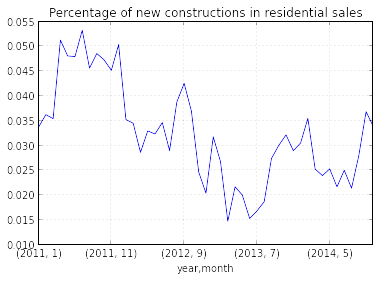

In [16]:
recentAnalysis = res[(res['YEAR BUILT']>1800)].pivot_table(index=['year','month'],columns=['isRecent'],values=['SALE PRICE'],
                                          aggfunc=np.count_nonzero)['SALE PRICE']
recentAnalysis['percentageRecent']=recentAnalysis[True].divide(recentAnalysis[False]+recentAnalysis[True])
recentAnalysis.loc[[2011,2012,2013,2014]]['percentageRecent'].plot(title='Percentage of new constructions in residential sales')

If we limit ourselves to Manhattan, the end of 2014 seems to have seen some increase in new construction sales ratio, but there is no clear trend:

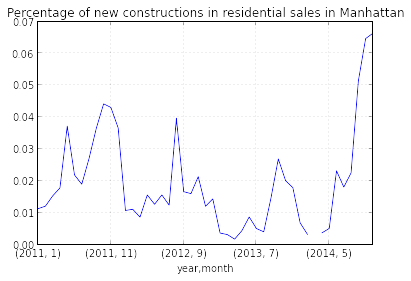

In [17]:
recentAnalysis = res[(res['YEAR BUILT']>1800) & (res['BOROUGH']==1)].pivot_table(index=['year','month'],columns=['isRecent'],values=['SALE PRICE'],
                                          aggfunc=np.count_nonzero)['SALE PRICE']
recentAnalysis['percentageRecent']=recentAnalysis[True].divide(recentAnalysis[False]+recentAnalysis[True])
recentAnalysis.loc[[2011,2012,2013,2014]]['percentageRecent'].plot(title='Percentage of new constructions in residential sales in Manhattan')

#Price Tiering
It's helpful to check the price distribution before we set the tiers:

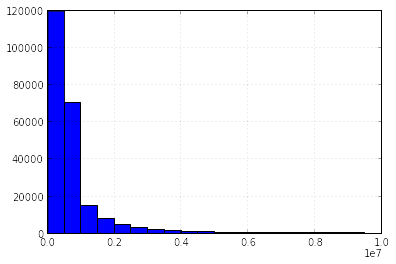

In [18]:
res[(res['SALE PRICE']<1e7)]['SALE PRICE'].hist(bins=20)

Since \$3M was given as a tiering level, and a lot of sales happened below \$1M, I decide to set four price tiers, corresponding to 
1. 0-\$500K
2. \$500K-\$1M
3. \$1M-\$3M
4. Above \$3M

In [19]:
mytier = [0,5e5,1e6,3e6]
res['price tier'] = np.digitize(res['SALE PRICE'],mytier)

Define functions that calculate the change relative to the same month the previous year:

In [20]:
def yoy(month_data):
    if len(month_data)<13:
        return np.nan
    if (month_data[0]==0): 
        return np.nan
    return (month_data[12]-month_data[0])/month_data[0]

def yoy_capextreme(month_data):
    if len(month_data)<13:
        return np.nan
    if (month_data[0]==0):
        if (month_data[12]>0):
            return 10 #year-over-year growth needs to be capped at some level in case the previous level is zero
        else:
            return 0
    return min(10,(month_data[12]-month_data[0])/month_data[0])

In [21]:
res_tier_count = res.pivot_table(index=['year','month'],columns=['price tier'],values=['SALE PRICE'],margins=False,  
                          aggfunc=np.count_nonzero)['SALE PRICE'].fillna(0)
res_yoy = pandas.rolling_apply(res_tier_count,13,yoy)

The figure below shows quite strikingly that the higher the price tier, the higher the growth over the last few years:

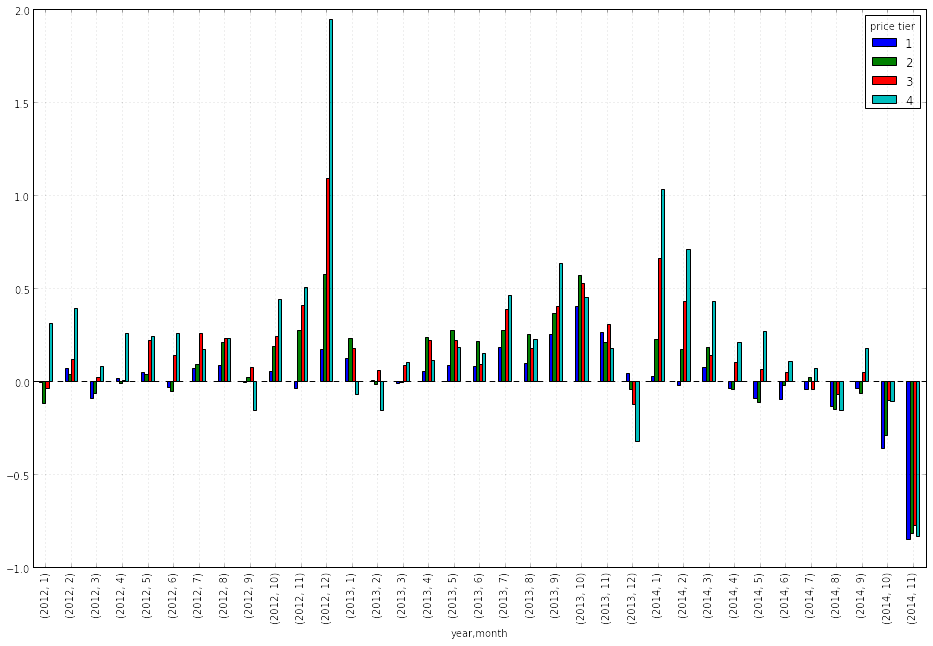

In [22]:
(res_yoy.loc[[2012,2013,2014]]).plot(kind='Bar',figsize=(16,10))

#Neighborhood Breakdown
Let's now check the neighborhood break down for below and above \$3M sales. Note that because >\$3M are rare in most neighborhoods, the percentage change data often varies wildy or is absent. The focus should be on the <\$3M category:  

In [23]:
res['under3M'] = res['price tier']<4 
res_under3M = res.pivot_table(index=['year','month'],columns=['NEIGHBORHOOD','under3M'],values=['SALE PRICE'],margins=False,  
                          aggfunc=np.count_nonzero)['SALE PRICE'].fillna(0)
res_yoy_under3M = pandas.rolling_apply(res_under3M,13,yoy_capextreme)

In [24]:
res_yoy_under3M.loc[2014]

NEIGHBORHOOD AIRPORT LA GUARDIA ALPHABET CITY           ANNADALE             \
under3M                   True          False     True     False      True    
month                                                                         
1                          10.0     -1.000000  0.166667        0   0.428571   
2                          -1.0     10.000000  1.000000        0   0.000000   
3                           0.0     -0.333333  0.666667        0  10.000000   
4                           0.0     -1.000000  0.000000        0   3.500000   
5                          -0.5      0.000000  0.500000        0  -0.312500   
6                           0.0      0.000000 -0.687500        0   0.125000   
7                           0.0     10.000000 -0.588235        0   1.100000   
8                           0.0      0.000000 -0.222222        0   0.142857   
9                          -1.0     -0.500000 -0.727273        0  -0.636364   
10                         -1.0     -0.750000 -0.222222        0  -0.250000   
11                          0.0     -1.000000 -0.375000        0  -1.000000   

NEIGHBORHOOD ARDEN HEIGHTS             ARROCHAR ARROCHAR-SHORE ACRES ARVERNE  \
under3M              False     True       True                 True    False   
month                                                                          
1                        0  0.222222   0.000000             1.000000       0   
2                        0 -0.058824   0.000000             0.000000       0   
3                        0  0.363636  -0.750000            10.000000       0   
4                        0 -0.400000  10.000000            -0.750000       0   
5                        0 -0.400000   0.000000            -0.333333       0   
6                        0  0.111111  -0.666667            10.000000       0   
7                        0  0.090909  10.000000            10.000000       0   
8                        0 -0.272727   0.000000            10.000000       0   
9                        0 -0.142857   0.000000            -0.500000       0   
10                       0  0.333333  -1.000000            -0.333333       0   
11                       0 -1.000000  -1.000000            -1.000000       0   

NEIGHBORHOOD    ...    WOODHAVEN           WOODLAWN           WOODROW  \
under3M         ...        False     True     False     True    False   
month           ...                                                     
1               ...            0  0.545455        0  0.000000       0   
2               ...            0 -0.529412        0 -0.250000       0   
3               ...            0  0.923077        0 -0.666667       0   
4               ...            0 -0.263158       10  0.000000       0   
5               ...            0 -0.388889        0  0.000000       0   
6               ...            0  1.000000        0 -0.714286       0   
7               ...           10  0.086957        0 -0.166667       0   
8               ...            0 -0.500000        0 -0.375000       0   
9               ...            0 -0.380952        0  3.500000       0   
10              ...            0 -0.055556        0  0.500000       0   
11              ...            0 -0.800000        0 -1.000000       0   

NEIGHBORHOOD           WOODSIDE           WYCKOFF HEIGHTS            
under3M          True     False     True            False     True   
month                                                                
1             2.000000        0  0.833333               0  0.000000  
2            -0.454545       -1  0.190476               0 -0.500000  
3            -0.166667        0  0.086957               0  0.400000  
4            -0.636364        0 -0.071429               0  0.750000  
5            -0.571429       10 -0.071429               0 -0.285714  
6             0.111111        0  0.041667               0  0.333333  
7             0.666667        0  0.172414               0  0.142857  
8            -0.500000        0  0.047619        

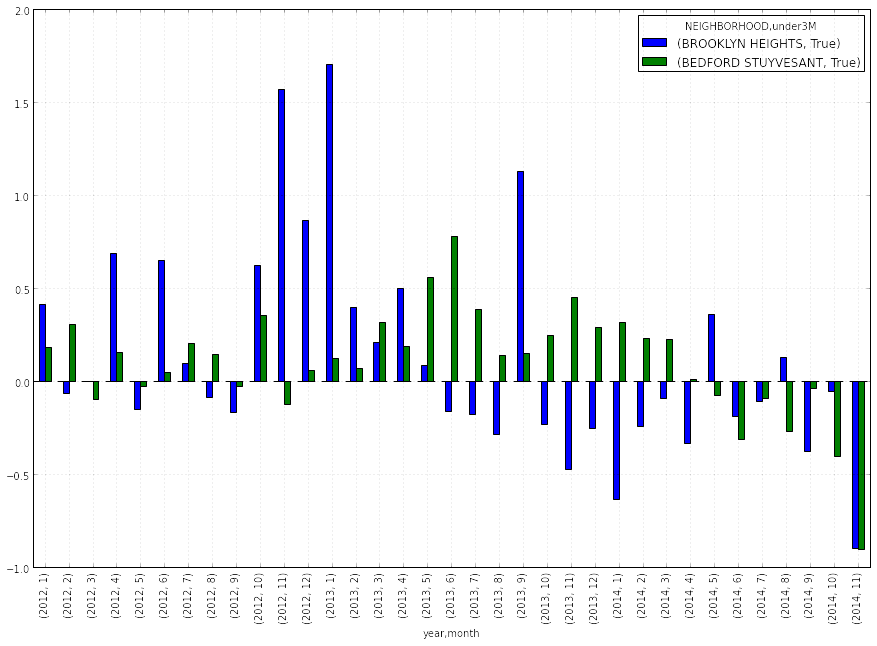

In [25]:
res_yoy_under3M[[('BROOKLYN HEIGHTS',True),('BEDFORD STUYVESANT',True)]].loc[[2012,2013,2014]].plot(kind='Bar',figsize=(15,10))

Comparing Brooklyn Heights to Bedford-Stuyvesant, the <$3M sales count for the former grew in 2012 while the latter catches up in 2013 going into 2014. The sales count is generally down towards the end of 2014 for most neighborhoods.

#Highest Turnover Neighborhoods

If we have detailed history of every residential unit sold, we can estimate the turnover rate per unit by the inverse of the recent time-between-sales and get some kind of representative turnover rate for each neighborhood. The problem of this approach is that 
1. The addresses in our data are sometimes not written consistently, and the apartment number often failed to be parsed
2. The last sale for each unit can go very far back

So a more robust approach is to estimate at the building (/lot) level instead of the unit level. Count the recent (i.e. 2014) turnover rate per building, and the unit turnover rate should be roughly that divided by the total number of units in the building. At the end when we want to estimate a neighborhood turnover rate, we can do a median or mean weighted by the number of units per building. 

Note that the total number of units also needs to be estimated, as the column 'RESIDENTIAL UNITS' is often zero even for big apartment buildings. One way to mitigate this problem is to count the number of unique addresses (containing different apt number) per lot in the data and use that number to supplement the RESIDENTIAL UNITS figure. 


In [26]:
def unique_len(grp):
    return len(grp.unique())

building_grp=res.groupby(['NEIGHBORHOOD','BLOCK','LOT'],as_index=False)
add_ct=building_grp.ADDRESS.aggregate(unique_len)
#The building count is basically the number of different addresses in the same lot in our data 
add_ct.columns=[u'NEIGHBORHOOD', u'BLOCK', u'LOT', u'building count']
res2 = pandas.merge(res,add_ct, how='left')
res2['estimated units']=res2[['RESIDENTIAL UNITS','building count']].max(axis=1)
res2['SALE DATE'] = pandas.DatetimeIndex(res2['SALE DATE'])
#An integer age of sale date is easier to work with in the turnover function
res2['sale age'] = (pandas.Timestamp('2015-01-01') - res2['SALE DATE']).apply(lambda x: x / np.timedelta64(1,'D'))

In [27]:
def building_turnover(sale_age):
    turnover = 0
    for a in sale_age:
        if a<=365:
            turnover = turnover + 1
    return turnover

In [28]:
building_data = res2.groupby(['NEIGHBORHOOD','BLOCK','LOT'],as_index=False).agg({'sale age':building_turnover,
                                                                 'estimated units':np.max})
building_data.columns = ['NEIGHBORHOOD','BLOCK','LOT','building turnover','estimated units']
building_data['unit turnover']=1.0*building_data['building turnover']/building_data['estimated units']

In [29]:
building_data

,NEIGHBORHOOD,BLOCK,LOT,building turnover,estimated units,unit turnover
0,AIRPORT LA GUARDIA,949,30,0,1,0.000000
1,AIRPORT LA GUARDIA,949,58,0,3,0.000000
2,AIRPORT LA GUARDIA,949,1012,0,1,0.000000
3,AIRPORT LA GUARDIA,949,1015,0,1,0.000000
4,AIRPORT LA GUARDIA,949,1018,0,1,0.000000
5,AIRPORT LA GUARDIA,949,1030,1,1,1.000000
6,AIRPORT LA GUARDIA,976,14,0,1,0.000000
7,AIRPORT LA GUARDIA,976,15,0,1,0.000000
8,AIRPORT LA GUARDIA,976,21,0,2,0.000000
9,AIRPORT LA GUARDIA,976,23,0,1,0.000000


In [30]:
median_turnover = []
mean_turnover = []
nlist = []
for neighborhood in building_data['NEIGHBORHOOD'].unique():
    selection = building_data[building_data['NEIGHBORHOOD']==neighborhood]
    median_turnover.append(weightedstats.weighted_median(selection['unit turnover'].tolist(),weights=selection['estimated units'].tolist()))
    mean_turnover.append(weightedstats.weighted_mean(selection['unit turnover'].tolist(),weights=selection['estimated units'].tolist()))
    nlist.append(neighborhood)

In [31]:
df_turnover=pandas.DataFrame({'median': pandas.Series(median_turnover,index=nlist),'mean':pandas.Series(mean_turnover,index=nlist)})
df_turnover

,mean,median
AIRPORT LA GUARDIA,0.117647,0.000000
ALPHABET CITY,0.052191,0.000000
ANNADALE,0.194882,0.000000
ARDEN HEIGHTS,0.184636,0.000000
ARROCHAR,0.168831,0.000000
ARROCHAR-SHORE ACRES,0.252632,0.000000
ARVERNE,0.056709,0.000000
ASTORIA,0.062322,0.000000
BATH BEACH,0.104087,0.000000
BATHGATE,0.038851,0.000000


In [32]:
print df_turnover.idxmax(axis=0)
print df_turnover.max(axis=0)

mean      OAKWOOD-BEACH
median    OAKWOOD-BEACH
dtype: object
mean      0.488372
median    0.500000
dtype: float64


#Mapping by zip code monthly year-over-year sales growth

First we need a dictionary of zipcode coordinates:

In [33]:
#File source = http://pablotron.org/files/zipcodes-csv-10-Aug-2004.zip 
geozc=pandas.read_csv('zipcode.csv',index_col=0,header=0)

In [40]:
def embed_map(map, path="map.html"):
    map.create_map(path=path)
    return HTML('<iframe src="files/{path}" style="width: 100%; height: 510px; border: none"></iframe>'.format(path=path))

def inline_map(map):
    """
    Embeds the HTML source of the map directly into the IPython notebook.
    
    This method will not work if the map depends on any files (json data). Also this uses
    the HTML5 srcdoc attribute, which may not be supported in all browsers.
    """
    map._build_map()
    return HTML('<iframe srcdoc="{srcdoc}" style="width: 100%; height: 510px; border: none"></iframe>'.format(srcdoc=map.HTML.replace('"', '&quot;')))


Converts percentage change to color:

In [41]:
def scale_to_hex(val):
    val = 0.5*(val+1)
    if val<0:
        val=0
    if val>1:
        val=1
    cscale=plt.get_cmap('YlOrRd')
    rgb = cscale(val)[0:3]
    rgb = tuple(np.round(255*x) for x in rgb)
    hex = "#%02x%02x%02x" % rgb
    return hex

Sales count change by year per zip code is used to generate the color of the marker on each zip code:

In [42]:
zip_count=(res_no12.pivot_table(index=['year'],columns=['ZIP CODE'],values=['SALE PRICE'],margins=False,  
                          aggfunc=np.count_nonzero).fillna(0)['SALE PRICE'])
zip_count_rate=pandas.rolling_apply(zip_count,2,rate_change).loc[2014]

We would plot the year-over-year growth by price tiers in each zip code. Note that the yoy function is capped at 10 when the previous year has zero sales in the same month.

In [43]:
zip_tier = res[(res['year']>=2013) & (res['ZIP CODE']>=10000)] \
.pivot_table(index=['year','month'],columns=['ZIP CODE','price tier'],values=['SALE PRICE'],margins=False,  
                          aggfunc=np.count_nonzero)['SALE PRICE'].fillna(0)
zip_yoy_tier = pandas.rolling_apply(zip_tier,13,yoy_capextreme)

In [44]:
mymap = folium.Map(location=[40.73,-73.90],tiles='Stamen Toner',zoom_start=11)
for c in zip_tier.columns.levels[0]:
    if c in geozc.index:
        bar = vincent.GroupedBar(zip_yoy_tier.loc[2014][c])
        bar.width = 400
        bar.height = 200
        bar.padding = {'top': 5, 'left': 40, 'bottom': 40, 'right': 100}
        bar.legend(title='Price Tier')
        bar.axis_titles(x='#Sales for months of 2014 compared to 2013, Zip code = '+str(c),y='')
        bar.to_json('v'+str(c)+'.json')
        mymap.circle_marker(location=[geozc.loc[c].latitude, geozc.loc[c].longitude], radius=400,
                        popup=(bar,'v'+str(c)+'.json'),line_color=hex,
                        fill_color=scale_to_hex(zip_count_rate[c]),fill_opacity=0.5)

In [45]:
inline_map(mymap)